In [1]:
# 유닛12 지하철 시간대별 데이터 시각화하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel('tmoney.xls', sheet_name=3, encoding='cp949', skiprows=7)
df.shape

(591, 53)

In [41]:
#df
df0 = df.drop(0) # 좌측에 0(index)이라고 써진 행을 버려라
df0

,2019-05,1호선,0155,동대문,776,12,"17,333","2,452","12,614","9,043",...,"14,421","1,199","5,052",1,68,0,0.1,0.2,0.3,2019-06-03 10:56:25
1,2019-05,1호선,157,제기동,360,6,"5,600","2,439","10,512","10,759",...,"9,194",393,"2,120",0,0,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,158,청량리(서울시립대입구),"1,430",9,"13,965","3,611","19,600","13,875",...,"20,670",547,"6,585",0,2,0,1,0,0,2019-06-03 10:56:25
3,2019-05,1호선,159,동묘앞,136,11,"3,712",876,"3,992","4,354",...,"5,014",304,"3,516",5,298,0,0,0,0,2019-06-03 10:56:25
4,2019-05,2호선,201,시청,109,2,"1,455","1,763","2,686","18,049",...,"6,257","1,795","1,960",1,85,1,1,0,0,2019-06-03 10:56:25
5,2019-05,2호선,202,을지로입구,131,3,"3,186","3,296","4,043","31,290",...,"13,655","4,724","4,329",3,"1,247",0,0,0,0,2019-06-03 10:56:25
6,2019-05,2호선,203,을지로3가,23,1,"1,223","2,116","2,767","20,647",...,"7,055","4,275","2,017",0,65,0,0,0,0,2019-06-03 10:56:25
7,2019-05,2호선,204,을지로4가,18,0,"1,114","1,021","1,786","11,771",...,"4,010","1,104","1,222",0,14,0,0,0,0,2019-06-03 10:56:25
8,2019-05,2호선,205,동대문역사문화공원,448,0,"11,814","1,129","7,391","10,024",...,"15,578","3,787","5,733",1,58,0,1,0,0,2019-06-03 10:56:25
9,2019-05,2호선,206,신당,49,2,"7,590","1,574","13,305","9,856",...,"15,525","1,290","5,716",6,17,0,0,0,0,2019-06-03 10:56:25
10,2019-05,2호선,207,상왕십리,19,0,"7,111",913,"15,081","6,434",...,"17,319",750,"6,210",2,24,0,0,0,0,2019-06-03 10:56:25


In [42]:
df0.head(2)

,2019-05,1호선,0155,동대문,776,12,"17,333","2,452","12,614","9,043",...,"14,421","1,199","5,052",1,68,0,0.1,0.2,0.3,2019-06-03 10:56:25
1,2019-05,1호선,157,제기동,360,6,"5,600","2,439","10,512","10,759",...,"9,194",393,"2,120",0,0,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,158,청량리(서울시립대입구),"1,430",9,"13,965","3,611","19,600","13,875",...,"20,670",547,"6,585",0,2,0,1,0,0,2019-06-03 10:56:25


#출근 시간대에 사람들이 (가장) 많이 타고 내리는 역은 어딜까?
- 출근 시간대는 언제인가 : 새벽~오전9시
- 상위 10개 역 : 정렬해서 큰 수 10개를 자른다.(mask 로 조건부 검색)
- 타는 역 / 내리는 역

<BarContainer object of 2 artists>

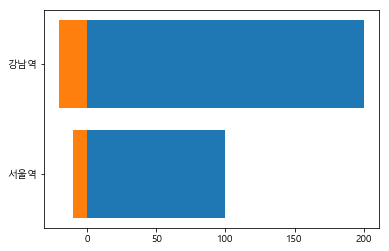

In [43]:
plt.rc('font', family='Malgun Gothic')
plt.barh(['서울역','강남역'],[100,200])
plt.barh(['서울역','강남역'],[-10,-20])

In [44]:
출근시간시작위치 = 4
출근시간끝위치 = 13
df0 = df0.replace(',','',regex=True)
arr = np.array(df0)
arr.shape
역이름 = arr[:,3]
역별승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2].astype(np.int)
역별승차인원[0], 역별하차인원[0]

(array([  360,  5600, 10512, 26059, 37545]),
 array([    6,  2439, 10759, 22594, 50517]))

In [45]:
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원합[0], 역별하차인원합[0]

(80076, 86315)

In [46]:
k = 10
threshold = np.sort(역별승차인원합)[-k]  #기준값
threshold

382801

In [47]:
mask = 역별승차인원합 > threshold
mask
기준이상역별하차인원합 = 역별하차인원합[mask]
역이름 = 역이름[mask]
기준이상역별하차인원합, 역이름

(array([374685, 150637, 149879, 397532, 221675,  95938,  65515,  65234,
         52712]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '화곡', '까치산'], dtype=object))

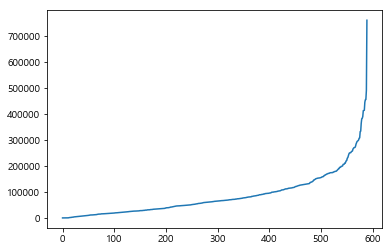

In [48]:
m = plt.plot(np.sort(역별승차인원합))

<BarContainer object of 9 artists>

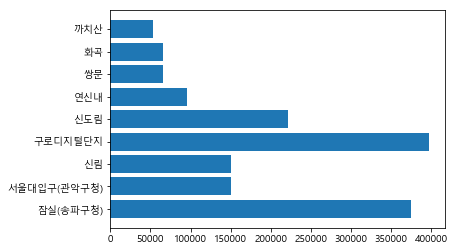

In [51]:
plt.rc('font', family='Malgun Gothic')
plt.barh(역이름, 기준이상역별하차인원합)

In [63]:
# 밤 11시에 사람들이 가장 많이 타는 역은 어디일까요? (힌트 : 밤11시에 컬럼 위치를 뒤에서 세어보세요.)

<BarContainer object of 10 artists>

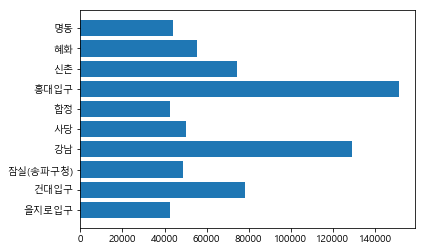

In [66]:
역이름 = arr[:,3]
밤11시역별승차인원 = arr[:, -11].astype(np.int)

k =10
threshold = np.sort(밤11시역별승차인원)[-k]
mask = 밤11시역별승차인원 >= threshold

plt.rc('font', family='Malgun Gothic')
plt.barh(역이름[mask], 밤11시역별승차인원[mask])